# DTW simple example

The dtw module contains a single function named dtw as well.

In [1]:
from dtw import dtw

## Let's define two sequences:

In [2]:
x = [14.793,14.813,14.96,14.911,14.695,14.557,15.383,14.842,14.881,14.646,14.616,14.754,14.793,14.823,14.901,14.842,14.911,14.744,14.754,14.852,14.685,14.911,14.734,14.646,14.695,14.626,14.615,14.724,14.646,14.41,14.44,14.528,14.714,14.744,14.665,14.685,14.449,14.164,14.184,14.164,14.066,14.007,13.958,14.095,14.252,14.38,14.4,14.302,14.223]
y = [14.29,14.11,13.7216,14.79,14.21,13.5,13.41,13.52,13.79,14.14,14.025,14.01,14.08,14.1,13.95,14.3445,14,14.25,13.89,13.7125,14.14,14.46,14.396,14.49,14.36,13.71,13.9,13.934,13.99,14.16,14.11,14.18,13.87,14.04,13.6,13.975,14.04,13.86,14.02,14.07,13.78,13.98,14.1262,14.12,13.9985,14.0001,14.1,14.14,14.06,14.21,14.03,13.71,13.881,14.05,13.98,13.99,13.99,14.12]

In [3]:
print(len(x))
print(len(y))

49
58


Populating the interactive namespace from numpy and matplotlib


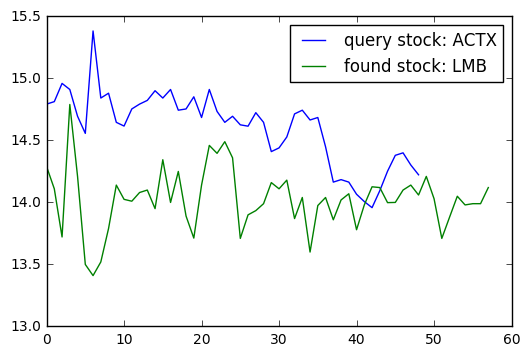

In [8]:
import matplotlib.pyplot as plt
%pylab inline

plt.plot(x, label = "query stock: ACTX")
plot(y, label = "found stock: LMB")
plt.legend(loc='upper right')

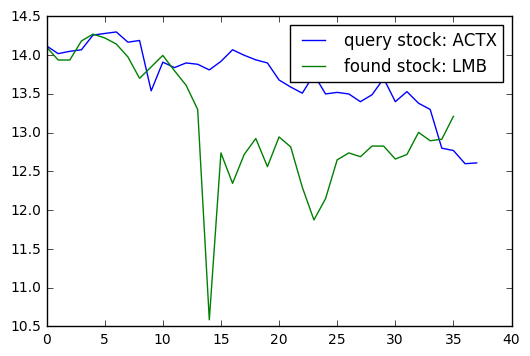

In [10]:
x = [14.12,14.02,14.05,14.07,14.26,14.28,14.3,14.1676,14.19,13.54,13.91,13.84,13.9,13.8828,13.81,13.92,14.07,13.999,13.94,13.9,13.68,13.5892,13.51,13.75,13.5,13.52,13.5,13.4,13.49,13.7,13.4,13.53,13.38,13.3,12.8,12.77,12.6,12.61]
y = [14.105,13.938,13.938,14.184,14.272,14.223,14.144,13.977,13.702,13.849,13.997,13.8,13.613,13.299,10.586,12.739,12.346,12.719,12.925,12.562,12.945,12.817,12.296,11.874,12.149,12.65,12.739,12.69,12.828,12.827,12.66,12.719,13.004,12.896,12.916,13.211]

plt.plot(x, label = "query stock: ACTX")
plot(y, label = "found stock: LMB")
plt.legend(loc='upper right')

## Compute DTW

In [32]:
dist, cost, path = dtw(x, y)

In [33]:
print('Minimum distance found:', dist)

Minimum distance found: 0.5


### You can plot the accumulated cost matrix and the "shortest" wrap path.

In [34]:
print(path)

(array([0, 0, 1, 2, 3, 3, 3, 3, 3, 4]), array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12]))


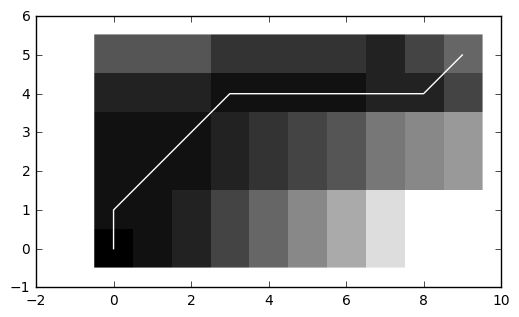

In [7]:
imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
# xlim((-0.5, cost.shape[0]-0.5))
# ylim((-0.5, cost.shape[1]-0.5))

## Using another distance

You can specify your own distance used as the cost measure by the DTW. By default the L1 norm is used.

In [7]:
def my_custom_norm(x, y):
    return (x * x) + (y * y)

dist, cost, path = dtw(x, y, dist=my_custom_norm)

Obviously you can also direcyly used those defined in [numpy](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html).

In [8]:
from numpy.linalg import norm

dist, cost, path = dtw(x, y, dist=norm)

## Using subsequences

The sequences used can be of different length. DTW can also be useful to detect subsequences.

In [9]:
x = range(10)
y = [0] * 5 + x

In [10]:
dist, cost, path = dtw(x, y)

(-0.5, 14.5)

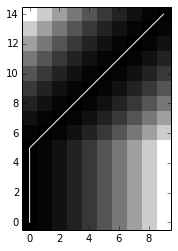

In [11]:
imshow(cost.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, cost.shape[0]-0.5))
ylim((-0.5, cost.shape[1]-0.5))